# Load Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import researchpy as rp
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from jupyterthemes import jtplot
jtplot.style(theme="grade3")

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [28]:
root_path = './data/s10_p1/'
file_name_prefix = 'lat_rel_1p_'
subNum = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
file_name_middle = 's_stamped100kb_1000hz_'
expNum = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
file_name_suffix = '.csv'

In [19]:
data_rec = np.zeros([len(subNum), len(expNum)])
data_late = np.zeros([len(subNum), len(expNum)])
data_toolate = np.zeros([len(subNum), len(expNum)])
data_loss = np.zeros([len(subNum), len(expNum)])

In [20]:
temp = root_path + file_name_prefix + subNum[3] + file_name_middle + expNum[0] + file_name_suffix
a = np.loadtxt(temp, skiprows=1, usecols=3, dtype=int)

In [21]:
for i in range(len(subNum)):
    for j in range(len(expNum)):
        temp = root_path + file_name_prefix + subNum[i] + file_name_middle + expNum[j] + file_name_suffix
        data_rec[i,j] = np.sum(np.loadtxt(temp, skiprows=1, usecols=3, dtype=int))
        data_late[i,j] = np.sum(np.loadtxt(temp, skiprows=1, usecols=4, dtype=int))
        data_toolate[i,j] = np.sum(np.loadtxt(temp, skiprows=1, usecols=5, dtype=int))
        data_loss[i,j] = np.sum(np.loadtxt(temp, skiprows=1, usecols=6, dtype=int))

# Make pd.DataFrame

In [108]:
df_late = pd.DataFrame(data=0.3*(data_late/data_rec)+0.7*(data_toolate/data_rec), columns=subNum)
df_loss = pd.DataFrame(data=data_loss, columns=subNum)

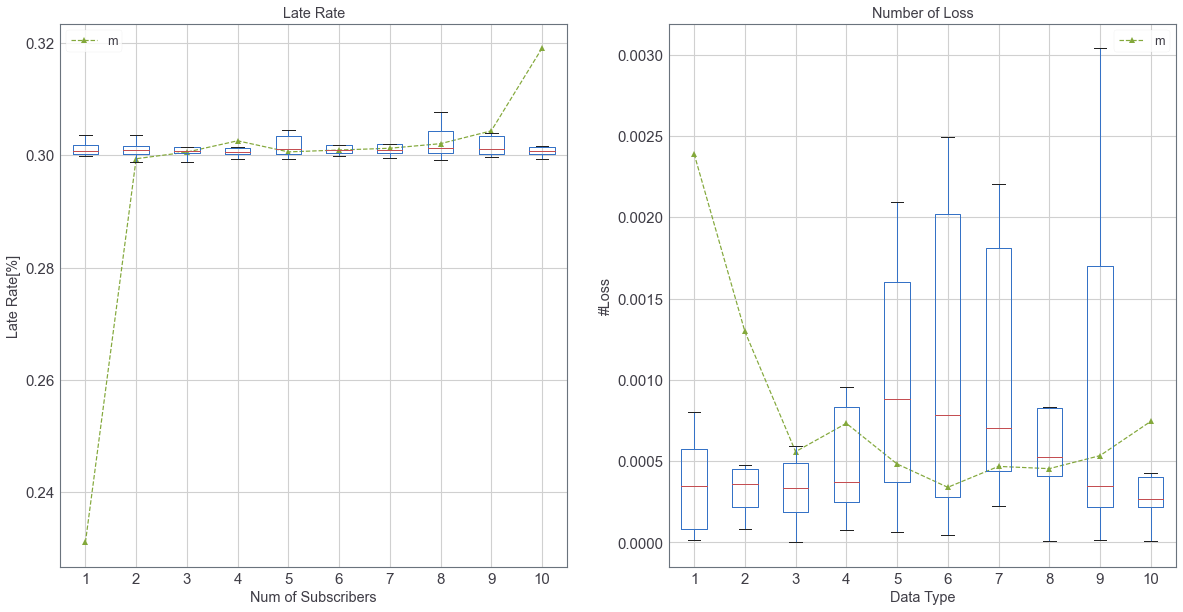

In [109]:
plt.figure(num=1, figsize=(20,10))
plt.subplots_adjust(hspace=0.25)
plt.subplot(1,2,1)
plt.plot(np.arange(1,11,1), np.mean(df_late, axis=1), '--^g')
plt.legend("mean")
boxplot = df_late.boxplot(fontsize=15, showfliers=False)
boxplot.set_ylabel("Late Rate[%]")
boxplot.set_xlabel("Num of Subscribers")
boxplot.set_title("Late Rate")
plt.subplot(1,2,2)
plt.plot(np.arange(1,11,1), np.mean(df_loss, axis=1), '--^g')
plt.legend("mean")
boxplot = df_loss.boxplot(fontsize=15, showfliers=False)
boxplot.set_ylabel("#Loss")
boxplot.set_xlabel("Data Type")
boxplot.set_title("Number of Loss")
plt.savefig("./figures/multi_sub_1_pub_reliability.pdf", dpi=1600)

# ANOVA Test

In [101]:
late_loss = np.array(df_loss).T.flatten('F')
late_late = np.array(df_late).T.flatten('F')

# temp = late_loss
temp = late_late

anova = pd.DataFrame({
    'late_rate': temp,
    
    'numSub': np.repeat(subNum, 10)
})

In [102]:
model_summary = rp.summary_cont(anova.groupby(['numSub']))['late_rate']
model_summary

,N,Mean,SD,SE,95% Conf.,Interval
numSub,,,,,,
1,10,0.2311,0.0110,0.0035,0.2232,0.2390
10,10,0.3190,0.0019,0.0006,0.3176,0.3204
2,10,0.2994,0.0004,0.0001,0.2991,0.2997
3,10,0.3006,0.0007,0.0002,0.3001,0.3010
4,10,0.3026,0.0049,0.0015,0.2991,0.3060
5,10,0.3006,0.0001,0.0000,0.3005,0.3007
6,10,0.3009,0.0005,0.0002,0.3005,0.3013
7,10,0.3012,0.0003,0.0001,0.3010,0.3014
8,10,0.3021,0.0007,0.0002,0.3016,0.3026


In [103]:
model = ols('late_rate ~ C(numSub)', anova).fit()

# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 9, 90) =  367.720, p =  0.0000


In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              late_rate   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     367.7
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           6.05e-67
Time:                        22:04:11   Log-Likelihood:                 418.41
No. Observations:                 100   AIC:                            -816.8
Df Residuals:                      90   BIC:                            -790.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2311      0.001    188.035      0.000       0.229       0.234
C(numSub)[T.10]     0.0879      0.002     50.600      0.000       0.084       0.091
C(numSub)[T.2]      0.0683      0.002     39.294      0.000       0.065       0.072
C(numSub)[T.3]      0.0695      0.002     39.974      0.000       0.066       0.073
C(numSub)[T.4]      0.0715      0.002     41.131      0.000       0.068       0.075
C(numSub)[T.5]      0.0695      0.002     39.994      0.000       0.066       0.073
C(numSub)[T.6]      0.0698      0.002     40.185      0.000       0.066       0.073
C(numSub)[T.7]      0.0702      0.002     40.367      0.000       0.067       0.074
C(numSub)[T.8]      0.0710      0.002     40.837      0.000       0.068       0.074
C(numSub)[T.9]      0.0733      0.002     42.147      0.000       0.070       0.077
==============================================================================
Omnibus:                       30.009   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.055
Skew:                           0.327   Prob(JB):                     1.75e-73
Kurtosis:                      11.944   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(numSub),0.049982,9.0,367.71979,6.052279e-67
Residual,0.001359,90.0,NaN,NaN


In [106]:
res.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &    sum\\_sq &    df &          F &        PR(>F) \\\\\n\\midrule\nC(numSub) &  0.049982 &   9.0 &  367.71979 &  6.052279e-67 \\\\\nResidual  &  0.001359 &  90.0 &        NaN &           NaN \\\\\n\\bottomrule\n\\end{tabular}\n'